In [5]:
from PIL import Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
#sns.set()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


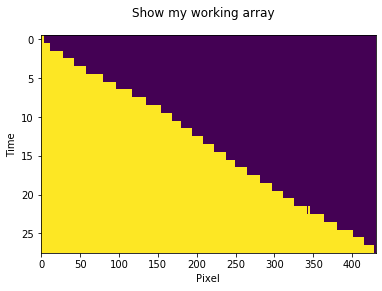

mean velocity = 1.6128915313225056 std 8.309666536121485 mm/s


In [6]:
im = Image.open("fFase3ch1.tif")
l,w=im.size
pix_val = list(im.getdata())
#pix_array is the image turned into an array of pixels
pix_array = 255-np.array(list(im.getdata())).reshape((w,l)) #np.reshape(pix_array) 

#see the array that you want to work and configure it
#The goal is the first row must start with yellow and the last must end with blue
work_array=pix_array[9:-6,3:-10]

#count the 1s in the binary array in axis of choice
ones=np.count_nonzero(work_array,1)
#start the analysis
py,px=work_array.shape
size=45 #mm
Dtime=120 #s
pix_val= size/px
x=ones*(size/px)
velocity=np.empty(py)
for z in range(py-1):
    velocity[z]=(ones[z+1]-ones[z])*pix_val/Dtime
mean_vel=np.mean(velocity)

#Showing Data
plt.imshow(work_array)
plt.axes().set_aspect('auto')
plt.xlabel('Pixel')
plt.ylabel('Time')
plt.suptitle('Show my working array')
plt.show()
print("mean velocity =", mean_vel,"std",np.std(velocity) ,"mm/s")

In [7]:
edge_list = [np.where(np.diff(work_array[i,:]))[0][0] for i in range(work_array.shape[0])]
edge_array1 = np.array(edge_list)

(28,)


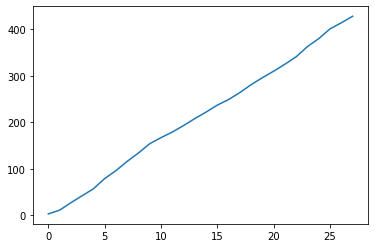

In [8]:
plt.plot(edge_array1)
last_pix = edge_array1.shape[0]
print(edge_array1.shape)

In [9]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(np.arange(last_pix), edge_array1)

In [10]:
r2 = r_value**2
print('pixels =',px, 'slope=',slope,'r2=',r2)

pixels = 431 slope= 15.756704980842912 r2= 0.9984353758458961


In [11]:
r2 = r_value**2
r2

0.9984353758458961

In [12]:
vel = slope/Dtime*pix_val
#should give ~45
print(slope/Dtime*pix_val*3240)
vel

44.418553484278746


0.013709430087740353

## Save data

In [13]:
#converting to mm and s
posmm = list(edge_array1*pix_val)
ts = list(np.arange(last_pix)*Dtime)
#create dataframe
df1 = pd.DataFrame({"pix": posmm,
                   "time": ts,
                   "channel": list(itertools.repeat(1, last_pix))

})

In [14]:
slope, intercept, r_value, p_value, std_err = linregress(ts, posmm)
r2 = r_value**2
print('pixels =',px, 'slope=',slope,'r2=',r2)

pixels = 431 slope= 0.013709430087740351 r2= 0.9984353758458966


In [52]:
df1

,pix,time,channel
0,0.313225,0,1
1,1.148492,120,1
2,2.819026,240,1
3,4.385151,360,1
4,5.951276,480,1
5,8.248260,600,1
6,10.023202,720,1
7,12.111369,840,1
8,13.990719,960,1
9,16.078886,1080,1


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


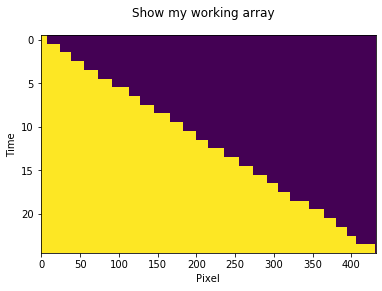

mean velocity = 17.2546875 std 84.45540829911256 mm/s


In [53]:
im = Image.open("fFase3ch2.tif")
l,w=im.size
pix_val = list(im.getdata())
#pix_array is the image turned into an array of pixels
pix_array = 255-np.array(list(im.getdata())).reshape((w,l)) #np.reshape(pix_array) 
#threshold values to 
'''
trh=1
pix_array[pix_array<=trh] = 1
pix_array[pix_array>trh] = 0
'''
#see the array that you want to work and configure it
work_array=pix_array[3:-15,3:-10]
#count the 1s in the binary array in axis of choice
ones=np.count_nonzero(work_array,1)
#start the analysis
py,px=work_array.shape
size=45 #mm
Dtime=120 #s
pix_val= size/px
x=ones*(size/px)
velocity=np.empty(py)
for z in range(py-1):
    velocity[z]=(ones[z+1]-ones[z])*pix_val/Dtime
mean_vel=np.mean(velocity)


#Showing Data
plt.imshow(work_array)
plt.axes().set_aspect('auto')
plt.xlabel('Pixel')
plt.ylabel('Time')
plt.suptitle('Show my working array')
plt.show()
print("mean velocity =", mean_vel,"std",np.std(velocity) ,"mm/s")

(25,)


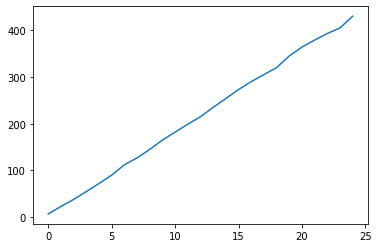

In [54]:
edge_list = [np.where(np.diff(work_array[i,:]))[0][0] for i in range(work_array.shape[0])]
edge_array2 = np.array(edge_list)
plt.plot(edge_array2)
last_pix = edge_array2.shape[0]
print(edge_array2.shape)

In [55]:
slope, intercept, r_value, p_value, std_err = linregress(np.arange(last_pix), edge_array2)
r2 = r_value**2
print('pixels =',px, 'slope=',slope,'r2=',r2)

pixels = 432 slope= 17.75923076923077 r2= 0.9995843772770142


In [56]:
vel = slope/Dtime*pix_val
#should give ~45
print(slope/Dtime*pix_val*3240,'mm/s')
vel

49.94783653846154 mm/s


0.015415998931623931

In [57]:
#converting to mm and s
posmm = list(edge_array2*pix_val)
ts = list(np.arange(last_pix)*Dtime)
#create dataframe
df2 = pd.DataFrame({"pix": posmm,
                   "time": ts,
                   "channel": list(itertools.repeat(2, last_pix))

})

In [58]:
df2

,pix,time,channel
0,0.729167,0,2
1,2.395833,120,2
2,3.958333,240,2
3,5.729167,360,2
4,7.500000,480,2
5,9.375000,600,2
6,11.666667,720,2
7,13.229167,840,2
8,15.104167,960,2
9,17.187500,1080,2


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


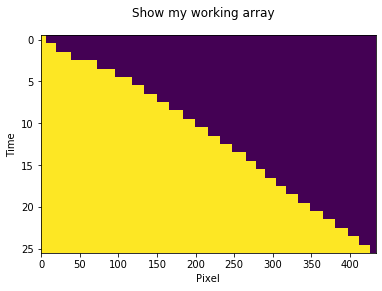

mean velocity = 16.398539968096422 std 81.92029208499632 mm/s


In [59]:
im = Image.open("fFase3ch3.tif")
l,w=im.size
pix_val = list(im.getdata())
#pix_array is the image turned into an array of pixels
pix_array = 255-np.array(list(im.getdata())).reshape((w,l)) #np.reshape(pix_array) 
#threshold values to 
'''
trh=1
pix_array[pix_array<=trh] = 1
pix_array[pix_array>trh] = 0
'''
#see the array that you want to work and configure it
work_array=pix_array[4:-13,:-12]
#count the 1s in the binary array in axis of choice
ones=np.count_nonzero(work_array,1)
#start the analysis
py,px=work_array.shape
size=45 #mm
Dtime=120 #s
pix_val= size/px
x=ones*(size/px)
velocity=np.empty(py)
for z in range(py-1):
    velocity[z]=(ones[z+1]-ones[z])*pix_val/Dtime
mean_vel=np.mean(velocity)

#Showing Data
plt.imshow(work_array)
plt.axes().set_aspect('auto')
plt.xlabel('Pixel')
plt.ylabel('Time')
plt.suptitle('Show my working array')
plt.show()
print("mean velocity =", mean_vel,"std",np.std(velocity) ,"mm/s")

(26,) 26


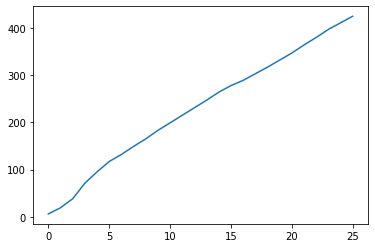

In [60]:
edge_list = [np.where(np.diff(work_array[i,:]))[0][0] for i in range(work_array.shape[0])]
edge_array3 = np.array(edge_list)
plt.plot(edge_array3)
last_pix = edge_array3.shape[0]
print(edge_array3.shape, last_pix)

In [61]:
slope, intercept, r_value, p_value, std_err = linregress(np.arange(last_pix), edge_array3)
r2 = r_value**2
print('pixels =',px, 'slope=',slope,'r2=',r2)

pixels = 434 slope= 16.380854700854705 r2= 0.9935780881574053


In [62]:
vel = slope/Dtime*pix_val
#should give ~45
print(slope/Dtime*pix_val*3240,'mm/s')
vel

45.85884438142504 mm/s


0.014153964315254642

In [63]:
#converting to mm and s
posmm = list(edge_array3*pix_val)
ts = list(np.arange(last_pix)*Dtime)
#create dataframe
df3 = pd.DataFrame({"pix": posmm,
                   "time": ts,
                   "channel": list(itertools.repeat(3, last_pix))

})

In [64]:
df3

,pix,time,channel
0,0.622120,0,3
1,1.970046,120,3
2,3.940092,240,3
3,7.361751,360,3
4,9.850230,480,3
5,12.131336,600,3
6,13.686636,720,3
7,15.449309,840,3
8,17.108295,960,3
9,18.974654,1080,3


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


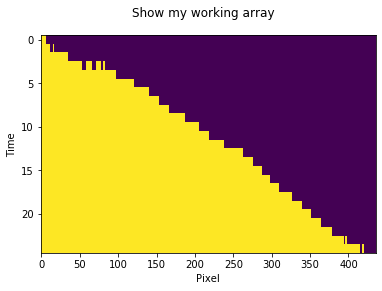

mean velocity = 16.73413990825688 std 81.90805087803064 mm/s


In [65]:
im = Image.open("fFase3ch4.tif")
l,w=im.size
pix_val = list(im.getdata())
#pix_array is the image turned into an array of pixels
pix_array = 255-np.array(list(im.getdata())).reshape((w,l)) #np.reshape(pix_array) 
#threshold values to 
'''
trh=1
pix_array[pix_array<=trh] = 1
pix_array[pix_array>trh] = 0
'''
#see the array that you want to work and configure it
work_array=pix_array[9:-9,:-8]
#count the 1s in the binary array in axis of choice
ones=np.count_nonzero(work_array,1)
#start the analysis
py,px=work_array.shape
size=45 #mm
Dtime=120 #s
pix_val= size/px
x=ones*(size/px)
velocity=np.empty(py)
for z in range(py-1):
    velocity[z]=(ones[z+1]-ones[z])*pix_val/Dtime
mean_vel=np.mean(velocity)

#Showing Data
plt.imshow(work_array)
plt.axes().set_aspect('auto')
plt.xlabel('Pixel')
plt.ylabel('Time')
plt.suptitle('Show my working array')
plt.show()
print("mean velocity =", mean_vel,"std",np.std(velocity) ,"mm/s")

(25,) 25


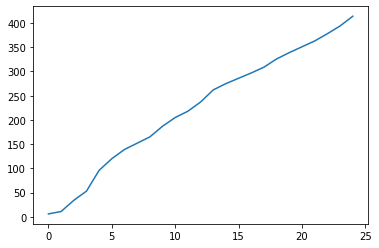

In [66]:
edge_list = [np.where(np.diff(work_array[i,:]))[0][0] for i in range(work_array.shape[0])]
edge_array4 = np.array(edge_list)
plt.plot(edge_array4)
last_pix = edge_array4.shape[0]
print(edge_array4.shape, last_pix)

In [67]:
slope, intercept, r_value, p_value, std_err = linregress(np.arange(25), edge_array4)
r2 = r_value**2
print('pixels =',px, 'slope=',slope,'r2=',r2)

pixels = 436 slope= 16.790769230769232 r2= 0.9866037031471024


In [68]:
vel = slope/Dtime*pix_val
#should give ~45
print(slope/Dtime*pix_val*3240,'mm/s')
vel

46.790790402258295 mm/s


0.014441601976005646

In [70]:
#converting to mm and s
posmm = list(edge_array4*pix_val)
ts = list(np.arange(last_pix)*Dtime)
#create dataframe
df4 = pd.DataFrame({"pix": posmm,
                   "time": ts,
                   "channel": list(itertools.repeat(4, last_pix))

})

In [71]:
df4

,pix,time,channel
0,0.619266,0,4
1,1.135321,120,4
2,3.509174,240,4
3,5.470183,360,4
4,9.908257,480,4
5,12.385321,600,4
6,14.346330,720,4
7,15.688073,840,4
8,17.029817,960,4
9,19.300459,1080,4


In [72]:
fdf = df1.append([df2,df3,df4], ignore_index = True)

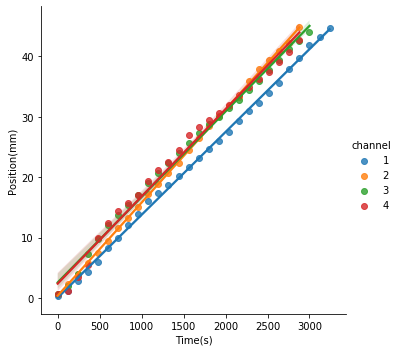

In [75]:
g = sns.lmplot(x="time", y="pix", hue="channel",
               truncate=True, height=5, data=fdf)
g.set_axis_labels("Time(s)", "Position(mm)")

In [84]:
all_r2 = list([0.9984353758458961,0.9995843772770142,0.9935780881574053,0.9866037031471024])
all_vel = list([0.013709430087740353,0.015415998931623931,0.014153964315254642,0.014441601976005646])
print(all_r2,all_vel)

[0.9984353758458961, 0.9995843772770142, 0.9935780881574053, 0.9866037031471024] [0.013709430087740353, 0.015415998931623931, 0.014153964315254642, 0.014441601976005646]


{'whiskers': [<matplotlib.lines.Line2D at 0x1a21a78c18>,
 'caps': [<matplotlib.lines.Line2D at 0x1a21a784e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a21a78240>],
 'medians': [<matplotlib.lines.Line2D at 0x1a20ab9a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a20ab94e0>],
 'means': []}

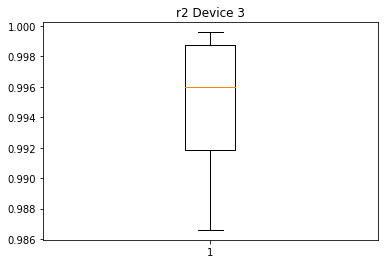

In [82]:
fig1, ax1 = plt.subplots()
ax1.set_title('r2 Device 3')
ax1.boxplot(all_r2)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a20c6d860>,
 'caps': [<matplotlib.lines.Line2D at 0x1a20c6d2e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a20c6dd68>],
 'medians': [<matplotlib.lines.Line2D at 0x1a20d77978>],
 'fliers': [<matplotlib.lines.Line2D at 0x10d608080>],
 'means': []}

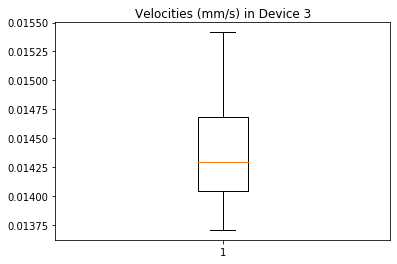

In [86]:
fig1, ax1 = plt.subplots()
ax1.set_title('Velocities (mm/s) in Device 3')
ax1.boxplot(all_vel)